___
# Ciência dos Dados - PROJETO 1

## Gabriel Miras e Mariana Abrantes
___

## Aposentadoria brasileira

___
## Introdução

**Neste primeiro projeto tinhamos como objetivo descobrir o perfil do aposentado brasileiro.E para isso, utilizamos os dados do PNAD do ano de 2015 e depois comparamos com uma variável do PNAD do ano de 2011. O projeto foi feito em partes. A primeira foi a seleção e limpeza dos dados que nos pareciam mais condizente com o tema e a segunda foi a análise de cada uma, descobrimos suas distribuições por cada região do país. Antes da conclusão escolhemos uma variável do ano de 2011 para poder comparar com uma variável de 2015, para assim verificar as diferenças durante esses anos.Por fim chegamos ao nosso perfil.**

___
## Importando os dados

In [95]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [96]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel Miras\Documents\INSPER\3 SEMESTRE (DP)\C DADOS DP\Projetos\Projeto 1


In [149]:
#Se usar o arquivo descompactado
dados = pd.read_csv('PES2015.csv',sep=',')
#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

## Renomeando as colunas

In [98]:
_dados = dados[['UF', 'V0302','V8005', 'V0402', 'V0601', 'V9042', 'V9531', 'V9054',
                'V9060','V9077', 'V4743', 'V4745']]

A = _dados.rename(index = str, columns = {'UF': "ESTADO"})
B = A.rename(index = str, columns = {'V0302': "SEXO"})
C = B.rename(index = str, columns = {'V8005': "IDADE"})
D = C.rename(index = str, columns = {'V0402': "CONDICAO"})
E = D.rename(index = str, columns = {'V0601': "ALFABETIZACAO"})
F = E.rename(index = str, columns = {'V9042': "CARTEIRA"})
G = F.rename(index = str, columns = {'V9531': "PAGAMENTO"})
H = G.rename(index = str, columns = {'V9054': "ESTABELECIMENTO"})
I = H.rename(index = str, columns = {'V9060': "T_PREVIDENCIA"})
J = I.rename(index = str, columns = {'V9077': "TRABALHO"})
M = J.rename(index = str, columns = {'V4743': "SALARIO"})
N = M.rename(index = str, columns = {'V4745': "ESTUDO"})

N.head()

,ESTADO,SEXO,IDADE,CONDICAO,ALFABETIZACAO,CARTEIRA,PAGAMENTO,ESTABELECIMENTO,T_PREVIDENCIA,TRABALHO,SALARIO,ESTUDO
0,11,2,23,1,1,4.0,1.0,1.0,NaN,NaN,4.0,5
1,11,4,23,1,1,2.0,1.0,1.0,2.0,NaN,4.0,5
2,11,4,35,1,1,4.0,1.0,1.0,2.0,NaN,4.0,6
3,11,2,34,2,1,NaN,1.0,3.0,NaN,NaN,4.0,7
4,11,4,11,3,1,NaN,NaN,NaN,NaN,NaN,4.0,2


## Alterando os dados de números para palavras

In [35]:
P = N[N['IDADE']>= 70]

P.SEXO = P.SEXO.astype('category')
P.SEXO.cat.categories = (['Masculino', 'Feminino'])

P.CONDICAO = P.CONDICAO.astype('category')
P.CONDICAO.cat.categories = (['Pessoa de referencia', 'Conjuge', 'Filho', 'Outro', 'Agregado', 'Pensionista', 'Empregado domestico', 'Parente do empregado domestico'])

P.ALFABETIZACAO = P.ALFABETIZACAO.astype('category')
P.ALFABETIZACAO.cat.categories = (['Sim', 'Nao'])

P.CARTEIRA = P.CARTEIRA.astype('category')
P.CARTEIRA.cat.categories = (['Sim', 'Nao'])

P.PAGAMENTO = P.PAGAMENTO.astype('category')
P.PAGAMENTO.cat.categories = (['Existia rendimento em dinheiro'])

P.ESTABELECIMENTO = P.ESTABELECIMENTO.astype('category')
P.ESTABELECIMENTO.cat.categories = (['Lojas, oficina, etc', 'fazenda, sitio etc', 'domicilio que trabalha',
                                     'domicilio de patrao etc', 'local designado pelo cliente etc', 'em veiculo motor', 'em via publica', 'outros' ])

P.T_PREVIDENCIA = P.T_PREVIDENCIA.astype('category')
P.T_PREVIDENCIA.cat.categories = (['Federal', 'Municipal', 'Estadual'])

P.TRABALHO = P.TRABALHO.astype('category')
P.TRABALHO.cat.categories = (['Empregado', 'Trabalhador domestico', 'Conta Propria', 'Empregador', 'Trabalhador nao remunerado na unidade domiciliar',
                             'outro trabalho nao remunerado', 'trabalhador no proprio negocio'])

P.SALARIO = P.SALARIO.astype('category')
P.SALARIO.cat.categories = (['Sem rendimento', 'Ate 1/4 de salario', 'mais de 1/4 ate 1/2 de salario', 'mais de 1/2 ate 1 de salario',
                               'mais de 1 ate 2 de salario', 'mais de 2 ate 3 de salario', 'mais de 3 ate 5 de salario', 'mais de 5 de salario',
                                'sem declaracao'])

P.ESTUDO = P.ESTUDO.astype('category')
P.ESTUDO.cat.categories = (['Sem instrucao', 'Fund. Incomp ou equivalente', 'Fund. compl ou equivalente', 'Med Incomp ou equivalente',
                            'Med compl ou equilavente', 'Sup Incompl ou equivalente', 'Superior completo', 'nao determinado'])

P.loc[(P.ESTADO>10)&(P.ESTADO<20), 'REGIAO'] = "Norte"
P.loc[(P.ESTADO>20)&(P.ESTADO<30), 'REGIAO'] = "Nordeste"
P.loc[(P.ESTADO>30)&(P.ESTADO<40), 'REGIAO'] = "Sudeste"
P.loc[(P.ESTADO>40)&(P.ESTADO<=50), 'REGIAO'] = "Sul"
P.loc[(P.ESTADO>=50)&(P.ESTADO<60), 'REGIAO'] = "Centro-Oeste"

#P.head()

C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

___
## Análise

**Depois de limpar e preparar a tabela, começamos o estudo das variaveis selecionadas. No primeiro momento iremos verificar como cada variável se distribui e depois como elas estão distribuidas em cada região do país.**

#### Distribuição da variável Salário

In [100]:
P.SALARIO.value_counts()

mais de 1/2 ate 1 de salario      8353
mais de 1 ate 2 de salario        6485
mais de 1/4 ate 1/2 de salario    1814
mais de 2 ate 3 de salario        1762
mais de 3 ate 5 de salario        1295
mais de 5 de salario              1102
sem declaracao                     522
Ate 1/4 de salario                 178
Sem rendimento                      21
Name: SALARIO, dtype: int64

#### Salário X Região

In [103]:
CT = pd.crosstab(P.SALARIO, P.REGIAO, normalize = 'index')*100
CT

REGIAO,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
SALARIO,,,,,
Sem rendimento,14.285714,23.809524,0.000000,52.380952,9.523810
Ate 1/4 de salario,2.808989,48.876404,22.471910,21.910112,3.932584
mais de 1/4 ate 1/2 de salario,6.174201,42.723264,18.357222,24.696803,8.048512
mais de 1/2 ate 1 de salario,8.176703,37.040584,13.348498,27.714594,13.719622
mais de 1 ate 2 de salario,9.221280,22.636854,9.468003,37.656130,21.017733
mais de 2 ate 3 de salario,9.137344,14.982974,7.491487,44.665153,23.723042
mais de 3 ate 5 de salario,10.193050,17.606178,6.949807,41.930502,23.320463
mais de 5 de salario,13.248639,18.058076,3.992740,43.647913,21.052632
sem declaracao,8.045977,19.731801,7.854406,46.934866,17.432950


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


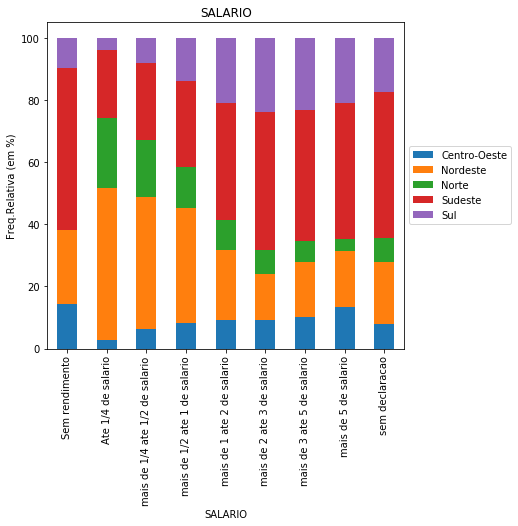

In [104]:
plot1 = CT.plot(kind='bar',stacked=True, title='SALARIO',figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Neste gráfico podemos observar, como está a distribuição do salário em cada região do país. Observamos que a região Sudeste é a que possui uma maior quantidade de pessoas que não recebem salário ou que recebem mais do que 5 salários minimos ou que não declararam. Já na região Norte e Nordeste, percebemos que a maior quantidade de pessoas está nas que ganham até 1/4 de salário mínimo. Nas regiões Centro-Oeste e Sul os dados estão melhores distribuidos em todas as categorias.**

#### Distribuição da variável Tipo de Previdência

In [64]:
Pre = P.T_PREVIDENCIA.value_counts()
Pre

Federal      404
Estadual      17
Municipal     13
Name: T_PREVIDENCIA, dtype: int64

#### Região X Tipo de Previdência

In [65]:
CT2 = pd.crosstab(P.REGIAO, P.T_PREVIDENCIA, normalize = 'index')*100
CT2

T_PREVIDENCIA,Federal,Municipal,Estadual
REGIAO,,,
Centro-Oeste,90.000000,7.500000,2.500000
Nordeste,90.540541,2.702703,6.756757
Norte,84.210526,5.263158,10.526316
Sudeste,94.705882,2.352941,2.941176
Sul,96.428571,1.785714,1.785714


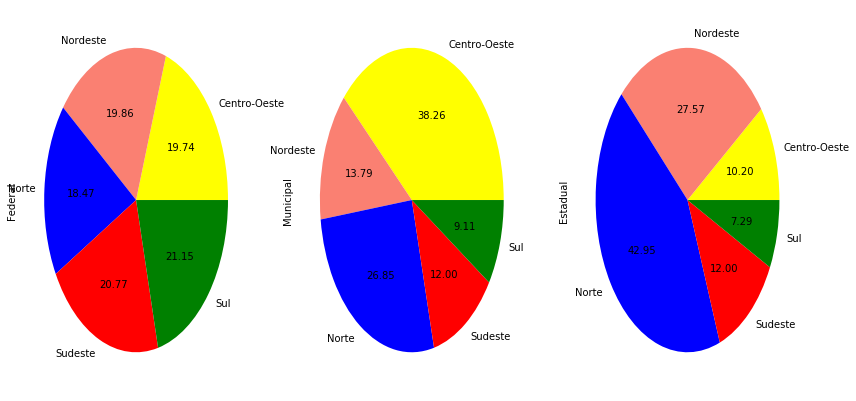

In [108]:
CT2.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False, subplots=True, figsize=(14,7))
plt.show()

**Analisando este gráfico, observamos que a 43% da população que mora na região Norte trabalhava para o estado, pois a maior concentração está na previdência estadual. Já na região Centro-Oeste, podemos concluir que 39% da população trabalhava para a prefeitura, pois a maior concentração está na previdência municipal. E as regiões Sul e Sudeste possuem suas maiores concentrações na previdência federal, podendo concluir que a população possui trabalhos mais diversos.**

#### Distribuição da variável Condição na Família

In [67]:
P.CONDICAO.value_counts()

Pessoa de referencia              14038
Conjuge                            4215
Outro                              3153
Agregado                            104
Pensionista                          26
Filho                                22
Empregado domestico                   8
Parente do empregado domestico        1
Name: CONDICAO, dtype: int64

### Condição na família X Região

In [151]:
CT3 = pd.crosstab(P.CONDICAO, P.REGIAO, normalize = 'index')*100
CT3

REGIAO,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
CONDICAO,,,,,
Pessoa de referencia,8.811797,28.985610,10.991594,34.143040,17.067958
Conjuge,8.825623,28.469751,10.889680,34.068802,17.746145
Filho,4.545455,50.000000,4.545455,27.272727,13.636364
Outro,8.309546,28.924833,12.337456,33.365049,17.063114
Agregado,9.615385,29.807692,16.346154,23.076923,21.153846
Pensionista,11.538462,30.769231,11.538462,38.461538,7.692308
Empregado domestico,12.500000,37.500000,0.000000,50.000000,0.000000
Parente do empregado domestico,0.000000,0.000000,0.000000,100.000000,0.000000


C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


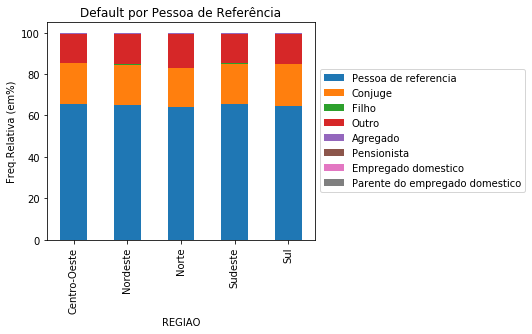

In [37]:
plot = CT3.plot(kind='bar', stacked=True,title='Default por Pessoa de Referência')
plt.ylabel('Freq.Relativa (em%)')

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Este gráfico nos mostra que em todas as regiões do país, os aposentados continuam sendo a pessoa de referência e sustendando suas famílias.**

#### Distribuição da variável Estudo

In [70]:
P.ESTUDO.value_counts()

Fund. Incomp ou equivalente    9571
Sem instrucao                  7310
Med compl ou equilavente       1813
Fund. compl ou equivalente     1313
Superior completo              1285
Med Incomp ou equivalente       174
Sup Incompl ou equivalente       94
nao determinado                   7
Name: ESTUDO, dtype: int64

#### Região X Estudo

In [180]:
CT4 = pd.crosstab(P.REGIAO, P.ESTUDO, normalize = 'index')*100
CT4

ESTUDO,Sem instrucao,Fund. Incomp ou equivalente,Fund. compl ou equivalente,Med Incomp ou equivalente,Med compl ou equilavente,Sup Incompl ou equivalente,Superior completo,nao determinado
REGIAO,,,,,,,,
Centro-Oeste,36.267232,42.364793,5.567338,0.742312,7.847296,0.371156,6.839873,0.000000
Nordeste,48.155278,35.097850,4.363170,0.673725,7.362849,0.240616,4.042348,0.064164
Norte,41.998342,40.671642,5.721393,0.995025,8.043118,0.165837,2.404643,0.000000
Sudeste,24.256074,48.375648,7.821458,0.832651,10.169260,0.586951,7.944308,0.013650
Sul,22.485845,55.513616,6.066325,0.889728,7.198706,0.674036,7.117822,0.053923


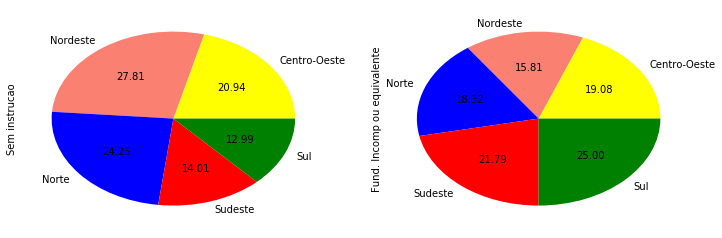

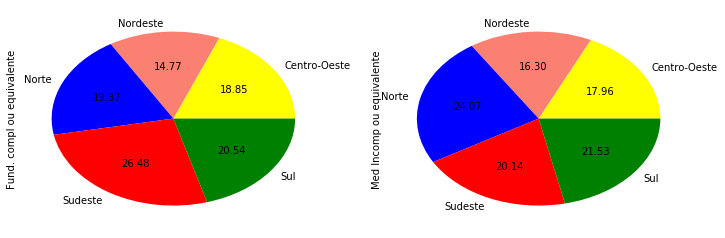

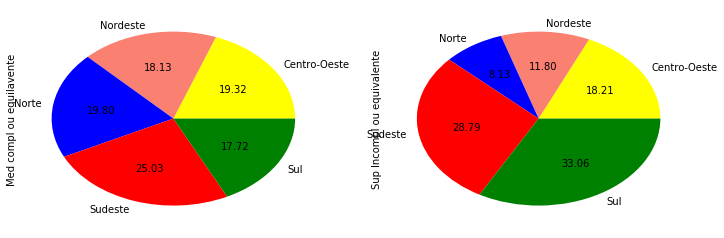

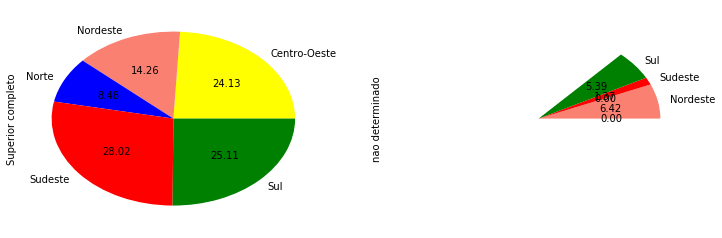

In [182]:
CT4_1 = CT4.iloc[:,0:2]
CT4_1.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False, subplots=True, figsize=(12,4))
plt.show()

CT4_2 = CT4.iloc[:,2:4]
CT4_2.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False, subplots=True, figsize=(12,4))
plt.show()

CT4_3 = CT4.iloc[:,4:6]
CT4_3.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False, subplots=True, figsize=(12,4))
plt.show()

CT4_4 = CT4.iloc[:,6:]
CT4_4.plot(kind='pie', colors=('yellow', 'salmon', 'blue', 'red', 'green'), autopct="%.2f", legend=False, subplots=True, figsize=(12,4))
plt.show()

**A partir da análise do gráfico, observamos que as regiões Centro-Oeste, Sudeste e Sul são as que apresentam as maiores grau escolaridades. Já nas regiões Norte e Nordeste as maiores concentrações estão em pessoas sem instrução ou com ensino médio incompleto ou equivalente.**

#### Distribuição da variável Sexo

In [73]:
P.SEXO.value_counts()

Feminino     12376
Masculino     9191
Name: SEXO, dtype: int64

#### Região X Sexo

In [74]:
CT5 = pd.crosstab(P.REGIAO, P.SEXO, normalize = 'index')*100
CT5

SEXO,Masculino,Feminino
REGIAO,,
Centro-Oeste,45.811241,54.188759
Nordeste,42.171960,57.828040
Norte,47.761194,52.238806
Sudeste,40.950041,59.049959
Sul,41.682394,58.317606


C:\Users\Gabriel Miras\Documents\INSPER\Programas Insper\AnacondaDownload\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


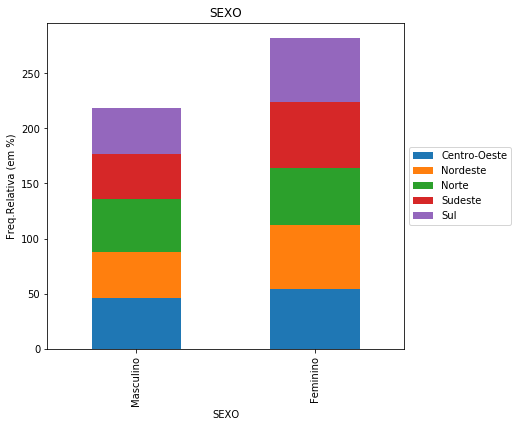

In [75]:
plot5 = CT5.T.plot(kind='bar',stacked=True, title='SEXO' ,figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)') #nao sei se é freq relativa

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**Podemos observar que a população brasileira acima dos 70 anos é maioritariamente feminina.**

## Comparação com a Tabela 2011

### Preparando tabela 2011

In [43]:
data = pd.read_csv('PES2011.csv',sep=',')
_data = data[['V0402', 'V4743', 'V8005']]
X = _data.rename(index = str, columns = {'V0402': "CONDICAO"})
W = X.rename(index = str, columns = {'V8005': "IDADE"})
Y = W.rename(index = str, columns = {'V4743': "SALARIO"})


Q = Y[Y['IDADE']>= 70]


Q.CONDICAO = Q.CONDICAO.astype('category')
Q.CONDICAO.cat.categories = (['Pessoa de referencia', 'Conjuge', 'Filho', 'Outro', 'Agregado', 'Pensionista', 'Empregado domestico', 'Parente do empregado domestico'])

Q.SALARIO = Q.SALARIO.astype('category')
Q.SALARIO.cat.categories = (['Sem rendimento', 'Ate 1/4 de salario', 'mais de 1/4 ate 1/2 de salario', 'mais de 1/2 ate 1 de salario',
                               'mais de 1 ate 2 de salario', 'mais de 2 ate 3 de salario', 'mais de 3 ate 5 de salario', 'mais de 5 de salario',
                                'sem declaracao'])

Q.head()

C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,CONDICAO,SALARIO,IDADE
16,Pessoa de referencia,mais de 1 ate 2 de salario,89
17,Conjuge,mais de 1 ate 2 de salario,72
45,Pessoa de referencia,mais de 1 ate 2 de salario,70
87,Outro,sem declaracao,82
109,Pessoa de referencia,mais de 1 ate 2 de salario,75


####  Condição na familia X Salário - 2015

In [44]:
CT6 = pd.crosstab(P.CONDICAO, P.SALARIO, normalize = 'index')*100
CT6 

SALARIO,nan,Ate 1/4 de salario,mais de 1/4 ate 1/2 de salario,mais de 1/2 ate 1 de salario,mais de 1 ate 2 de salario,mais de 2 ate 3 de salario,mais de 3 ate 5 de salario,mais de 5 de salario,sem declaracao
CONDICAO,,,,,,,,,
Outro,0.031716,1.490644,10.497938,30.986362,32.889312,10.212496,7.104345,4.091342,2.695845
Pessoa de referencia,0.128223,0.790711,8.213421,39.435817,29.762074,7.971221,5.919647,5.449494,2.329392
Conjuge,0.047450,0.427046,7.663108,42.562278,29.110320,7.378410,5.456702,4.839858,2.514828
Agregado,0.000000,1.923077,5.769231,35.576923,34.615385,6.730769,7.692308,3.846154,3.846154
Filho,0.000000,0.000000,4.545455,40.909091,31.818182,13.636364,9.090909,0.000000,0.000000


#### Condição na família X Salário - 2011

In [45]:
CT7 = pd.crosstab(Q.CONDICAO, Q.SALARIO, normalize = 'index')*100
CT7 

SALARIO,Sem rendimento,Ate 1/4 de salario,mais de 1/4 ate 1/2 de salario,mais de 1/2 ate 1 de salario,mais de 1 ate 2 de salario,mais de 2 ate 3 de salario,mais de 3 ate 5 de salario,mais de 5 de salario,sem declaracao
CONDICAO,,,,,,,,,
Pessoa de referencia,0.673946,0.810442,8.488313,36.435762,28.570210,8.198260,5.877837,5.331855,5.613377
Conjuge,0.325926,0.533333,6.785185,39.111111,29.096296,7.703704,5.807407,4.977778,5.659259
Outro,0.069156,1.798064,10.650069,29.875519,30.567082,9.716459,6.085754,3.941909,7.295989
Agregado,1.136364,1.136364,6.818182,27.272727,35.227273,10.227273,5.681818,2.272727,10.227273
Filho,0.000000,0.000000,0.000000,47.368421,36.842105,5.263158,5.263158,5.263158,0.000000


C:\Users\Mariana Abrantes\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


KeyError: <class 'object'>

<Figure size 72x432 with 0 Axes>

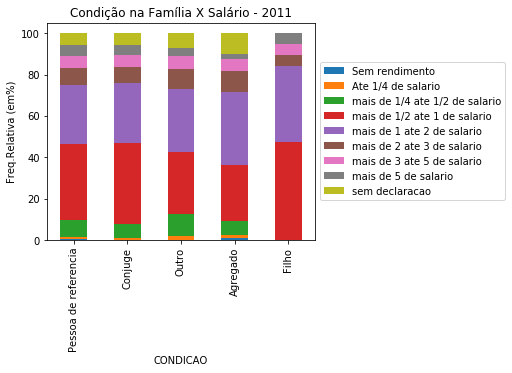

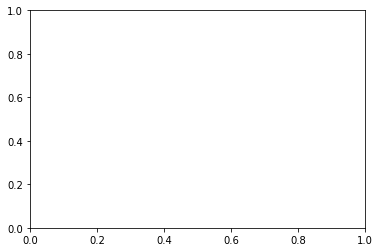

In [50]:
fig = plt.figure(figsize=(1,6))

plot = CT7.plot(kind='bar', stacked=True,title='Condição na Família X Salário - 2011')
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plot = CT6.plot(kind='bar', stacked=True,title='Condição na Família X Salário - 2015')
plt.ylabel('Freq.Relativa (em%)')
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

___
## Conclusão 

Descreva aqui suas conclusões!